In [3]:
#Importando a biblioteca matplolib para ter acesso aos métodos e funções de geração de gráficos
import matplotlib


In [4]:
#Importando a função make_regression da biblioteca sklearn
from sklearn.datasets import make_regression

In [7]:
#Gerando valores randomicos dentro de plano cartesiano x, y para criação de uma regressão linear com o make_regression
x, y = make_regression(n_samples=200, n_features=1, noise=30)




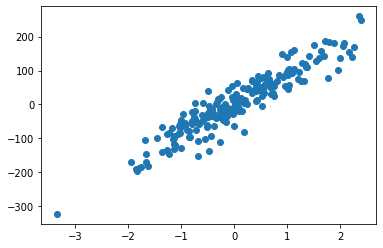

In [8]:
#Gerando gráfico com matplolib
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.show()

In [9]:
# IMPLEMENTAÇÃO DE REDE NEURAL COMPLETA. TRABALHANDO O PROBLEMA DO MNIST

In [10]:
# Importanado as bibliotecas
import numpy as np
import torch
import torch.nn.functional as f
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim


In [11]:
transform = transforms.ToTensor() #definindo a coversão de imagem para padrão tensor

trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform) #Carrega a prte de treino do dataset
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True) # Cria um buffer para pegar os dados por partes

valset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=transform) # Carrega a parte de validação do dataset
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True) # Cria um buffer para pegar os dados por partes

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



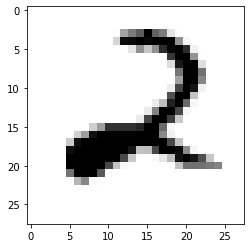

In [12]:
# Conferindo se a estrutura de dados está representando a imagem corretamente

dataiter = iter(trainloader)
imagens, etiquetas = dataiter = dataiter.next()
plt.imshow(imagens[0].numpy().squeeze(), cmap='gray_r')

In [56]:
print(imagens[0].shape) # Conferindo as dimensões tensor da imagem
print(etiquetas[0].shape)

torch.Size([1, 28, 28])
torch.Size([])


In [24]:
# Montando as estrutura da rede com o modelo inceptionV3 da Keras
class Modelo(nn.Module):
  def __init__(self):
    super(Modelo, self).__init__()
    self.linear1 = nn.Linear(28*28, 128) # camada de entrada, 784 neurônios que se ligam a 128 neurônios
    self.linear2 = nn.Linear(128, 64) # camda interna 1, 128 neurônios que se ligam a 64 neurônios
    self.linear3 = nn.Linear(64, 10) # camada interna 2, 64 neurônios que se ligam a 10
      # para a camada de saída não é necessário definir nada, pois só precisamos pegar o output da camada interna 2

  def forward(self,X):
    X = F.relu(self.linear1(X)) # fjunção de ativação da camada de entrada para camada interna 1
    X = F.relu(self.linear2(X)) # função de ativação de camada interna 1 para a camada interna 2
    X = self.linear3(X) # função de ativação da camada interna 2 para a camada de saída, nesse caso f(x) = x

    return F.log_softmax(X, dim=1) # dados ultizados para calcular a perda




In [14]:
def treino(modelo, trainloader, device):

  otimizador = optim.SGD(modelo.parameters(), lr=0.01, momentum=0.05) # define a política de atualização dos pesos da bias
  inicio1 = time() # timer para sabermos quanto tempo levou o treino

  criterio = nn.NLLLoss() # define o criterio para calcular a perda
  EPOCHS = 10 # numero de epochs (vezes) que o algorítimo rodará
  modelo.train() # ativando o modo de treinamento do modelo

  for epoch in range(EPOCHS):
    perda_acumulada = 0 # inicialização da perda acumulada da epoch em questão

    for imagens, etiquetas in trainloader:

      imagens = imagens.view(imagens.shape[0], -1) # convertendo as imagens para "vetores" de 28*28 casas fixas
      otimizador.zero_grad() # zerando os gradientes por conta do ciclo anterior

      output = modelo(imagens.to(device)) # colocando os dados no modelo
      perda_instantanea = criterio(output, etiquetas.to(device)) #calculando a perda da epoch em questão

      perda_instantanea.backward()  #back propagation a partir da perda 

      otimizador.step() # atualizando os pesos e a bias

      perda_acumulada += perda_instantanea.item() # atualização da perda acumuluda


  else:
      print("Epoch {} -  Perda resultante: {}" .format(epoch+1, perda_acumulada/len(trainloader)))

#print("\nTempo de treino (em minutos) =", (time()-inicio1/60)



    



In [28]:
def validacao(modelo, valloader, device):
  conta_corretas, contas = 0,0
  for imagens,etiquetas in valloader:
    for i in range(len(etiuetas)):
      img = imagens[i].view(1, 784)
      # desativar o autograd para acelerar a validação. Grafos computacionais dinâmicos tem um custo alto de processamento
      with torch.nograd():
          logps = modelo(img.to(device)) # output de modelo em escala logarítimica

      
      ps = torch.exp(logps) # converte output para escala normal(lembrando que é um tensor)
      probab = list(ps.cpu().numpy()[0])
      etiqueta_pred = probab.index(max(probab)) # converte o tensor em um número, no , o número que o modelo previu
      etiqueta_certa = etiquetas.numpy()[i] 
      if(etiqueta_certa == etiqueta_pred): # compra a previsão com valor correto
        conta_corretas += 1
      conta_todas += 1

    print("Total de imagens testadas =", conta_todas)
    print("\nPrecisão do modelo = {}%".format(conta_corretas*100/conta_todas))


In [27]:
modelo = Modelo()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")